## Fastbook Sandbox

In [1]:
import torch
from fastai.vision.all import *
from fastbook import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:

ex = torch.rand(2, 2, 2)* 0.5
ax = torch.rand(2, 2, 2)* -1
print(ex.shape)
print(ax.shape)
ax

torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


tensor([[[-0.9408, -0.1332],
         [-0.9346, -0.5936]],

        [[-0.8694, -0.5677],
         [-0.7411, -0.4294]]])

In [3]:
def mnist_distance(a,b): return (b-a).abs().mean()
mnist_distance(ex, ax)

tensor(0.9750)

## Pytorch can derivate any function in any point

In [4]:
xt = torch.tensor(3.).requires_grad_()

In [5]:
def f(x): return x**2
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [6]:
yt.backward()

In [7]:
xt.grad

tensor(6.)

In [8]:
xt = torch.tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [9]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [10]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## SDG quadratic example

In [11]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

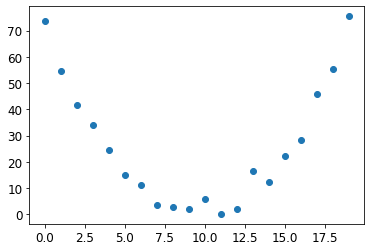

In [12]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [13]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [14]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [15]:
params = torch.randn(3).requires_grad_()

In [16]:
params

tensor([ 0.5227, -0.2384, -0.0499], requires_grad=True)

In [17]:
??to_np

Signature: to_np(x)
Source:   
def to_np(x):
    "Convert a tensor to a numpy array."
    return apply(lambda o: o.data.cpu().numpy(), x)
File:      ~/.pyenv/versions/3.8.5/lib/python3.8/site-packages/fastai/torch_core.py
Type:      function


In [18]:
ex = torch.rand(2, 4)* 0.5
ax = torch.rand(2, 4)* -1
ex, ax

(tensor([[0.2657, 0.0794, 0.3271, 0.1639],
         [0.3266, 0.1979, 0.4573, 0.1018]]),
 tensor([[-0.2018, -0.2018, -0.9497, -0.6666],
         [-0.9811, -0.0874, -0.0041, -0.1088]]))

In [19]:
r = torch.tensor([1]*len(ex) + [0]*len(ax)).unsqueeze(1)
r

tensor([[1],
        [1],
        [0],
        [0]])

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

In [20]:
qx = torch.rand(2,2)* 0.5
px = torch.rand(2,2)* -1
dset = list(zip(qx, px))
dset


[(tensor([0.0818, 0.3513]), tensor([-0.2418, -0.1591])),
 (tensor([0.3395, 0.4577]), tensor([-0.7653, -0.2979]))]

In [21]:
list(ex)
x,y = dset[0]
x, y

(tensor([0.0818, 0.3513]), tensor([-0.2418, -0.1591]))

## Matrix Multiplication

In Python, matrix multiplication is represented with the @ operator.

In [22]:
r = x@y
r

tensor(-0.0757)

In [23]:
r = 1/(1+torch.exp(-x))
r

tensor([0.5204, 0.5869])

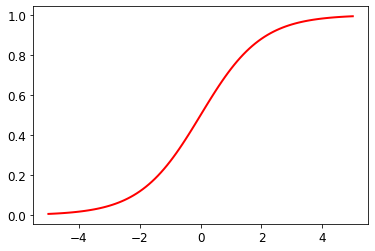

In [24]:
x = torch.range(-5,5,0.1)
def sigmoid(x): return 1/(1+torch.exp(-x))
plt.plot(x, sigmoid(x), color='red', lw=2)

In [25]:
a = np.array([[1, 2],[3, 4]])
b = np.array([[5, 6],[7, 8]])
print(a@b)
print(np.matmul(a,b))
print(np.dot(a,b))
print(a*b)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[ 5 12]
 [21 32]]


In [26]:
a = torch.tensor([[1, 2, 3],[3, 4, 5]])
print('a.size() ', a.size())
#print('a.shape() ',a.shape())
#print('Rank: ' len(a.shape)
b = torch.tensor([[5, 6],[7, 8],[9, 10]])
c = torch.tensor([[5, 6, 7], [8, 9, 10]])
print('b.size() ', b.size())
print('c.size() ', c.size())
print(a@b)
print(torch.mm(a,b))
print(torch.matmul(a,b))
# print(a*b) element-wise matrix multiplication (Hadamard product).  Works if shape is the same for a and b
print(a*c)
ac = a*c
print('ac.size() ', ac.size())

a.size()  torch.Size([2, 3])
b.size()  torch.Size([3, 2])
c.size()  torch.Size([2, 3])
tensor([[ 46,  52],
        [ 88, 100]])
tensor([[ 46,  52],
        [ 88, 100]])
tensor([[ 46,  52],
        [ 88, 100]])
tensor([[ 5, 12, 21],
        [24, 36, 50]])
ac.size()  torch.Size([2, 3])


```python
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()
```

## DataLoader <br>
A DataLoader can take any Python collection and turn it into an iterator over many batches, like so:

In [36]:
coll = range(20)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 5,  9,  8, 15,  4]),
 tensor([16,  0, 12, 18,  6]),
 tensor([19,  3, 17, 11,  1]),
 tensor([ 2, 13,  7, 10, 14])]

In [2]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [3]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 7, 24, 17, 21,  5, 19]), ('h', 'y', 'r', 'v', 'f', 't')),
 (tensor([ 9, 15, 14,  4, 16,  0]), ('j', 'p', 'o', 'e', 'q', 'a')),
 (tensor([22, 13, 25,  3,  2, 11]), ('w', 'n', 'z', 'd', 'c', 'l')),
 (tensor([12, 23,  1, 10,  8, 20]), ('m', 'x', 'b', 'k', 'i', 'u')),
 (tensor([18,  6]), ('s', 'g'))]

In [4]:
torch.randperm(10)[:3]

tensor([6, 5, 4])

In [15]:
a = [(1, 0.4), (2, 0.5), (3, 0.3), (4, 0.1), (5, 0.4), (6, 0.2), (7, 0.3), (8, 0.1)]
tex = torch.tensor(a)

In [27]:
dl = DataLoader(tex, batch_size=2, shuffle=True)
print(list(dl))
xb,yb = first(dl)
xb.shape,yb.shape
yb

[tensor([[5.0000, 0.4000],
        [2.0000, 0.5000]]), tensor([[4.0000, 0.1000],
        [3.0000, 0.3000]]), tensor([[8.0000, 0.1000],
        [6.0000, 0.2000]]), tensor([[1.0000, 0.4000],
        [7.0000, 0.3000]])]


tensor([4.0000, 0.1000])

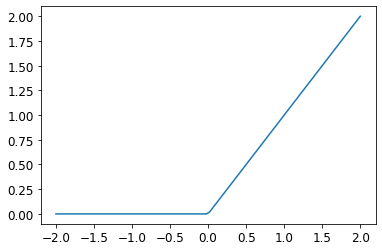

In [28]:
plot_function(F.relu)